# **1. Import Libraries and Set Configurations**


In [ ]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from zipfile import ZipFile

print("Import Successfully")

Import Successfully


# **2. Unzip Dataset**


In [ ]:
# Unzip
file_path = '/content/FER 2013 Dataset.zip'
with ZipFile(file_path , 'r') as ZipFile:
  ZipFile.extractall()
  print('Zip file extracted successfully')

Zip file extracted successfully


# **3. Define Training and Validation Directories**


In [ ]:
# Directories
train_dir = '/content/train'
val_dir = '/content/test'

# **4. Visualize Sample Images from Each Emotion Class**


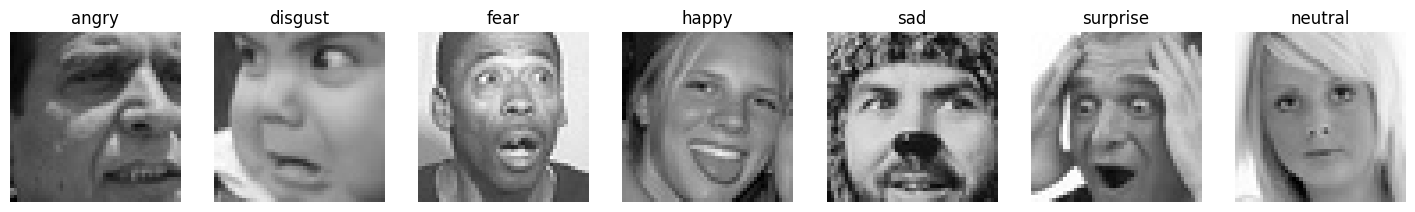

In [ ]:
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
img_size = 48

# Sample images
plt.figure(figsize=(18, 22))
for i, expression in enumerate(emotion_list):
    img_path = os.path.join(train_dir, expression, os.listdir(os.path.join(train_dir, expression))[59])
    img = load_img(img_path)
    plt.subplot(1, 7, i+1)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
plt.show()

# **5. Create Train and Validation Sets**


In [ ]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

val_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)


print('Train and Validation sets have been created.')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


# **6. CNN Model Architecture and Compilation**


In [ ]:
# CNN Model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Classifier
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


# **7. Model Summary**


In [ ]:
# Get model summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,872,583 (22.40 MB)

 Trainable params: 5,869,767 (22.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

# **8. Callbacks**


In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=49, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# **9. Train the model**


In [ ]:
# Train
history = model.fit(
    train_set,
    epochs=50,
    validation_data=val_set,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.1802 - loss: 2.6725 - val_accuracy: 0.2485 - val_loss: 1.8973 - learning_rate: 5.0000e-04
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.2123 - loss: 2.0726 - val_accuracy: 0.2636 - val_loss: 1.7754 - learning_rate: 5.0000e-04
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.2342 - loss: 1.9205 - val_accuracy: 0.2853 - val_loss: 1.7239 - learning_rate: 5.0000e-04
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.2505 - loss: 1.8419 - val_accuracy: 0.2575 - val_loss: 1.7960 - learning_rate: 5.0000e-04
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.2633 - loss: 1.7956 - val_accuracy: 0.3112 - val_loss: 1.7376 - learning_rate: 5.0000e-04
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.2874 - loss: 1.7511 - val_accuracy: 0.3246 - val_loss: 1.6910 - learning_rate: 5.0000e-04
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/ste

# **10. Final Accuracy Evaluation**


In [ ]:
# Final Accuracy

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(train_set, verbose=0)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_set, verbose=0)

# Print results
print(f"Overall Training Accuracy: {train_acc * 100:.2f}%")
print(f"Overall Validation Accuracy: {val_acc * 100:.2f}%")

Overall Training Accuracy: 64.74%
Overall Validation Accuracy: 65.83%


# **11. Plot Accuracy and Loss Curves**


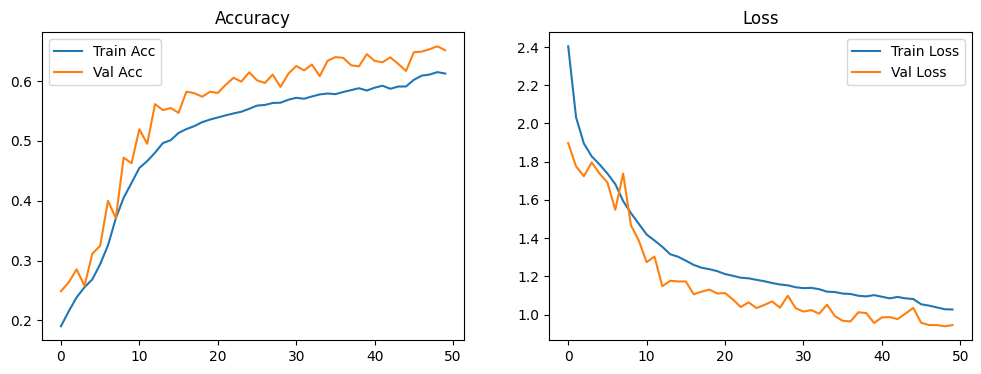

In [ ]:
# Plot Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history.history['accuracy'], label='Train Acc')
ax[0].plot(history.history['val_accuracy'], label='Val Acc')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].set_title('Loss')
ax[1].legend()

plt.show()

# **12. Predict on Validation Set**


In [ ]:
# Predict on validation set
predictions = model.predict(val_set)
y_pred = [np.argmax(p) for p in predictions]
y_test = val_set.classes
class_names = list(val_set.class_indices.keys())

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step


## **15. Plot Confusion Matrix**


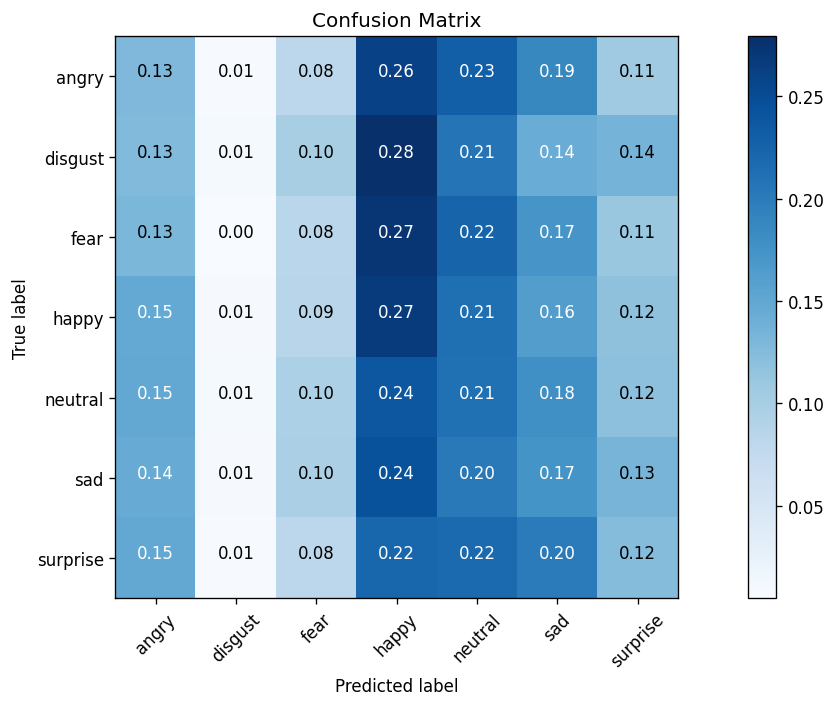

In [ ]:
# Confusion matrix plotting function
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
    plt.figure(figsize=(12, 6), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)

## **16. Plot Training vs Validation Accuracy and Loss**


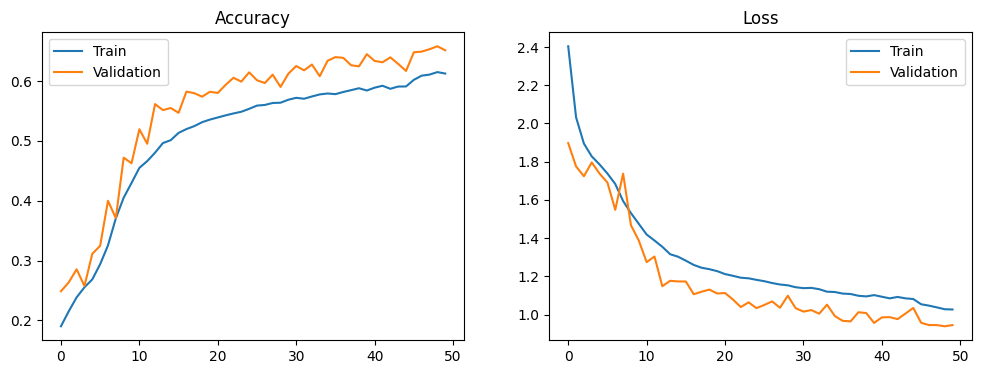

In [ ]:
# Accuracy and Loss Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'], label='Train')
ax[0].plot(history.history['val_accuracy'], label='Validation')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train')
ax[1].plot(history.history['val_loss'], label='Validation')
ax[1].set_title('Loss')
ax[1].legend()
plt.show()

## **17. Load and Display a Single Test Image**


Image shape: (48, 48)


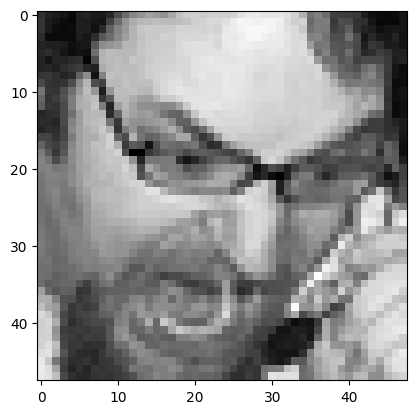

In [ ]:
# Predict a single image
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
img_path = "/content/test/angry/PrivateTest_10131363.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode="grayscale")
img_array = np.array(img)
plt.imshow(img_array, cmap='gray')
print("Image shape:", img_array.shape)

## **18. Preprocess and Predict the Emotion of a Single Image**


In [ ]:
# Preprocess and predict
img_array = img_array.reshape(1, 48, 48, 1)
result = model.predict(img_array)[0]
print("Raw prediction:", result)

predicted_class = np.argmax(result)
print("Predicted label:", label_dict[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Raw prediction: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0926756e-25]
Predicted label: Angry


## **19. Save Trained Model and Weights**


In [ ]:
# Save model and weights
model.save('Face_Emotion_Recognition.h5')
model.save_weights('Face_Emotion_Recognition_Weights.weights.h5')